# import neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataSet

In [3]:
movies=pd.read_csv('netflix_titles.csv')

# Data Preproccessing

In [4]:
movies.head() #first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
movies.tail() #last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
movies.columns #all columns list

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data=movies[['title','director','cast','country','release_year','rating','description','duration']] 
data['index']=range(len(data))
data.shape

C:\Users\prave\AppData\Local\Temp\ipykernel_15016\3361275982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index']=range(len(data))


(8807, 9)

In [8]:
data['index']

0          0
1          1
2          2
3          3
4          4
        ... 
8802    8802
8803    8803
8804    8804
8805    8805
8806    8806
Name: index, Length: 8807, dtype: int64

In [9]:
data.describe() #BASIC STATISTICS

,release_year,index
count,8807.000000,8807.000000
mean,2014.180198,4403.000000
std,8.819312,2542.506244
min,1925.000000,0.000000
25%,2013.000000,2201.500000
50%,2017.000000,4403.000000
75%,2019.000000,6604.500000
max,2021.000000,8806.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8807 non-null   object
 1   director      6173 non-null   object
 2   cast          7982 non-null   object
 3   country       7976 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8803 non-null   object
 6   description   8807 non-null   object
 7   duration      8804 non-null   object
 8   index         8807 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 619.4+ KB


In [11]:
data.shape #No of rows and column

(8807, 9)

# Data Cleaning

In [12]:
any_null=data.isna().values.any() #checking null values
print(f"Null values {any_null}") 

#If any null values occurs 
data.fillna('unknown',inplace=True)
#or
#data.fillna(data['col1'].mean(),inplace=True)

Null values True


C:\Users\prave\AppData\Local\Temp\ipykernel_15016\2541318517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna('unknown',inplace=True)


In [13]:
find_duplicate=data.duplicated().values.any()
print(f"Dupicate occurence {find_duplicate}")

#If any duplicte values occured
#data.drop_duplicates(inplace=True)

Dupicate occurence False


In [14]:
data.shape

(8807, 9)

In [15]:
#total no of movies
no_of_movies=len(movies.index)
print(f"{no_of_movies} movies are listed")

8807 movies are listed


In [16]:
#top 10 movies released recently

recently_released=data.sort_values(by='release_year',ascending=False).head(10).reset_index()
recently_released[['title','release_year']]


,title,release_year
0,Ali & Ratu Ratu Queens,2021
1,Black Holes | The Edge of All We Know,2021
2,Sweet & Sour,2021
3,Sweet Tooth,2021
4,Trippin' with the Kandasamys,2021
5,Xtreme,2021
6,Alan Saldaña: Locked Up,2021
7,Creator's File: GOLD,2021
8,Dancing Queens,2021
9,Myriam Fares: The Journey,2021


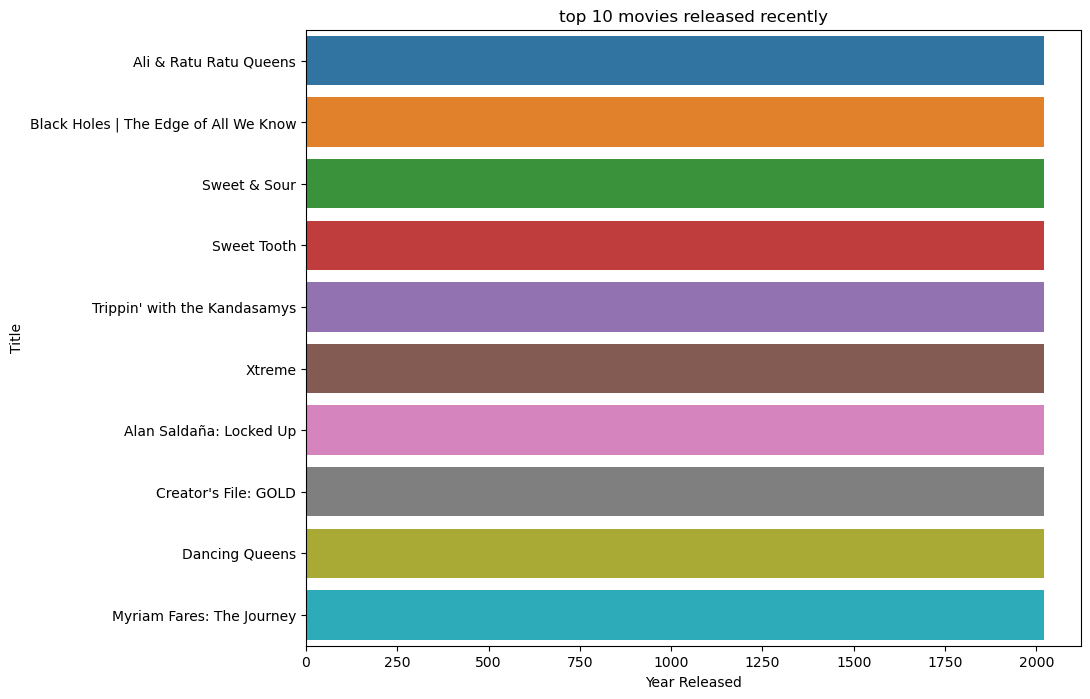

In [17]:
#TOP 10 MOVIES RELEASED RECENTLY
plt.figure(figsize=(10,8))
sns.barplot(data=recently_released,x='release_year',y='title')#hue='country'
plt.xlabel("Year Released")
plt.ylabel("Title")
plt.title("top 10 movies released recently")
plt.show()

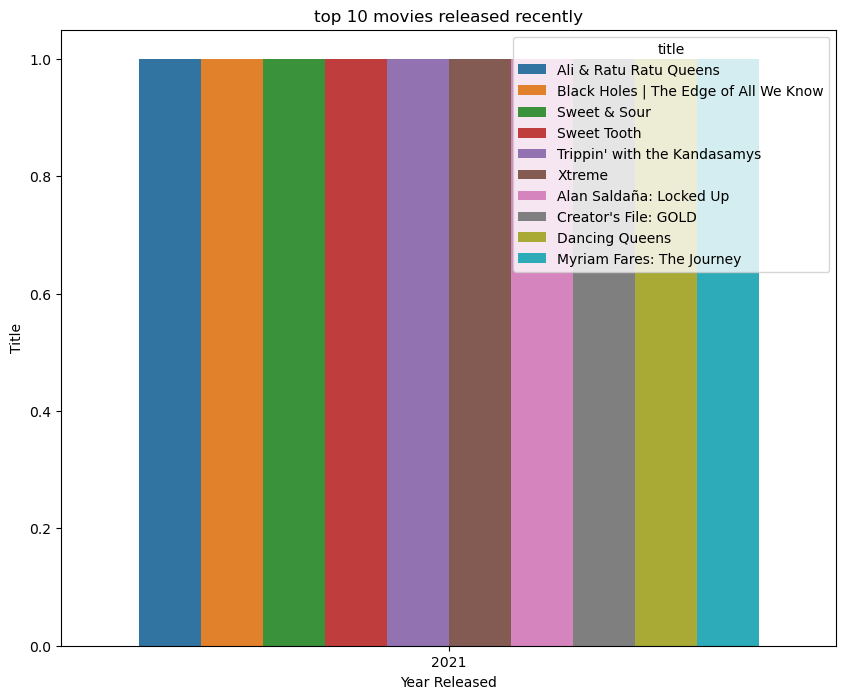

In [18]:
#Top 10 movies relesed based on year

plt.figure(figsize=(10,8))
sns.countplot(data=recently_released,x='release_year',hue='title')#hue='country'
plt.xlabel("Year Released")
plt.ylabel("Title")
plt.title("top 10 movies released recently")
plt.show()

In [19]:
#top 10 highest rating movies
Highest_rating=data.sort_values(by='rating',ascending=False).head(5).reset_index()
Highest_rating[['title','rating']]

,title,rating
0,Little Lunch,unknown
1,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown
2,Gargantia on the Verdurous Planet,unknown
3,My Honor Was Loyalty,unknown
4,You Don't Mess with the Zohan,UR


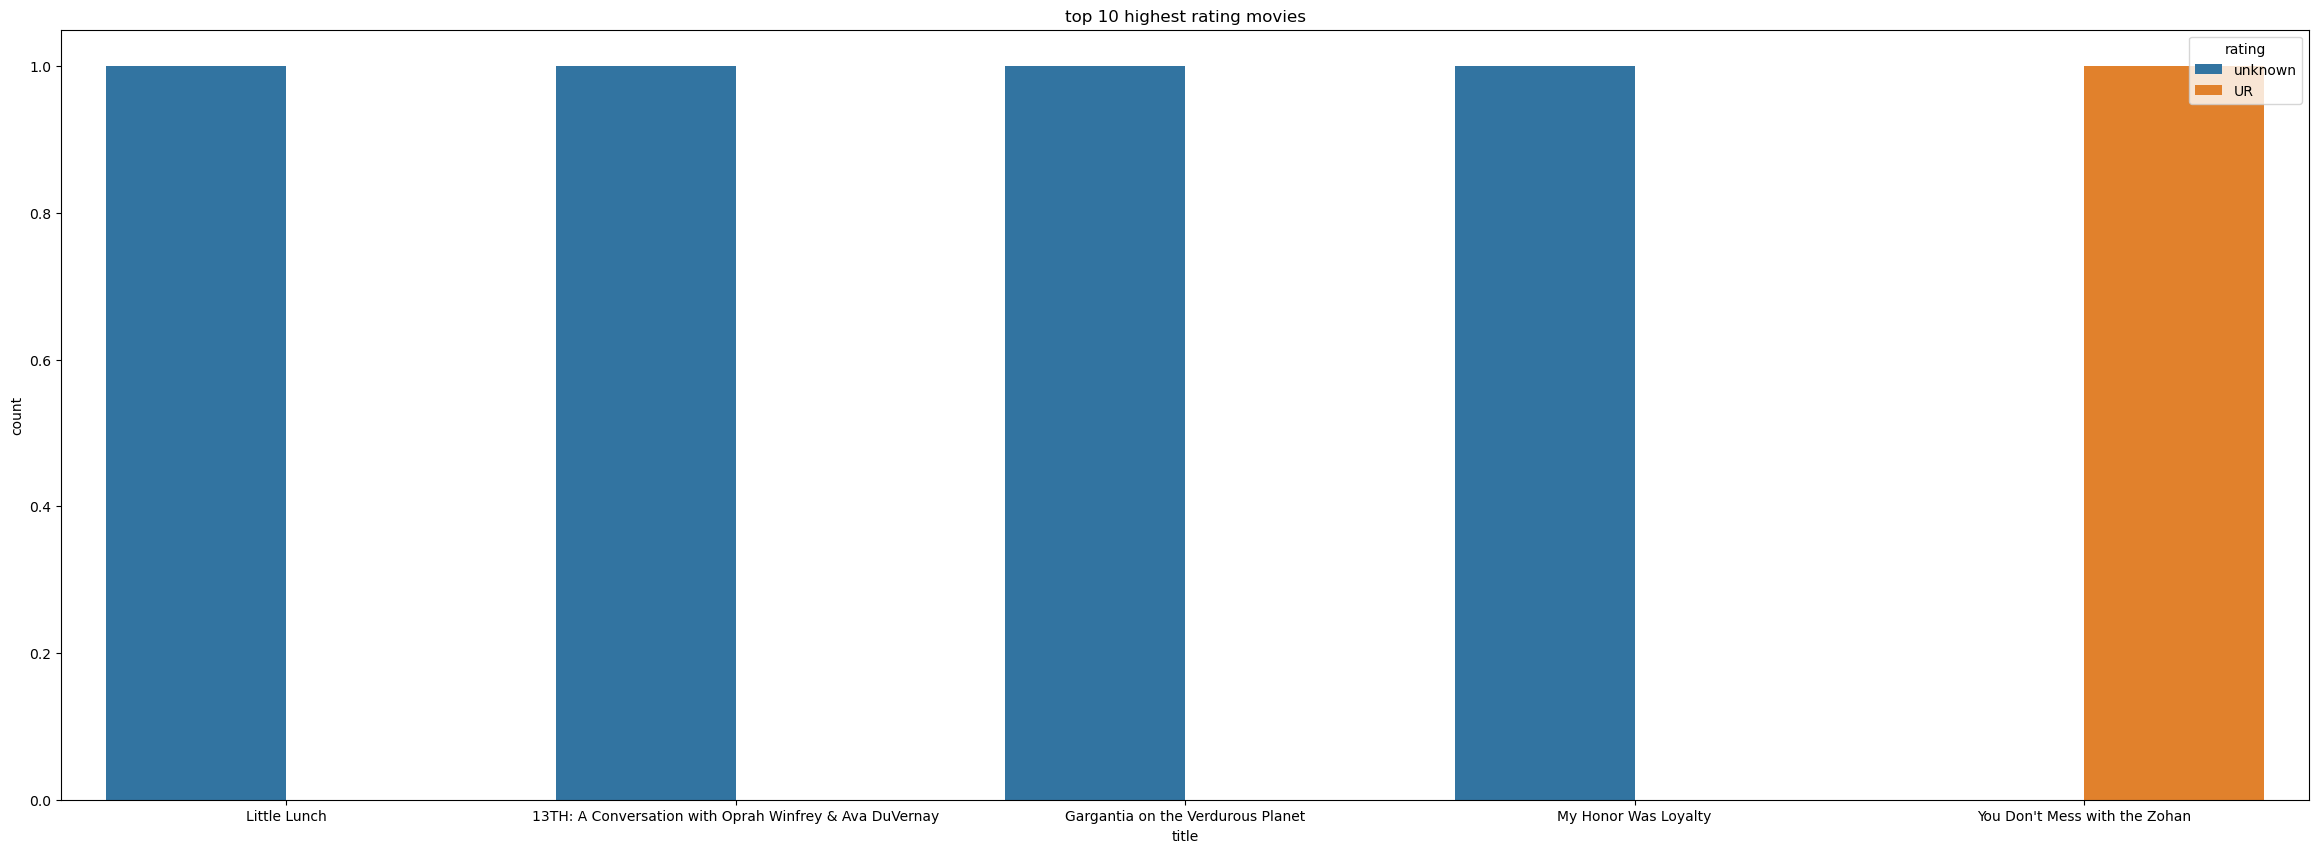

In [20]:
#top 10 highest rating movies
plt.figure(figsize=(29,10))
sns.countplot(data=Highest_rating,x='title',hue='rating')
plt.title('top 10 highest rating movies')
plt.xlabel('title')
plt.show()


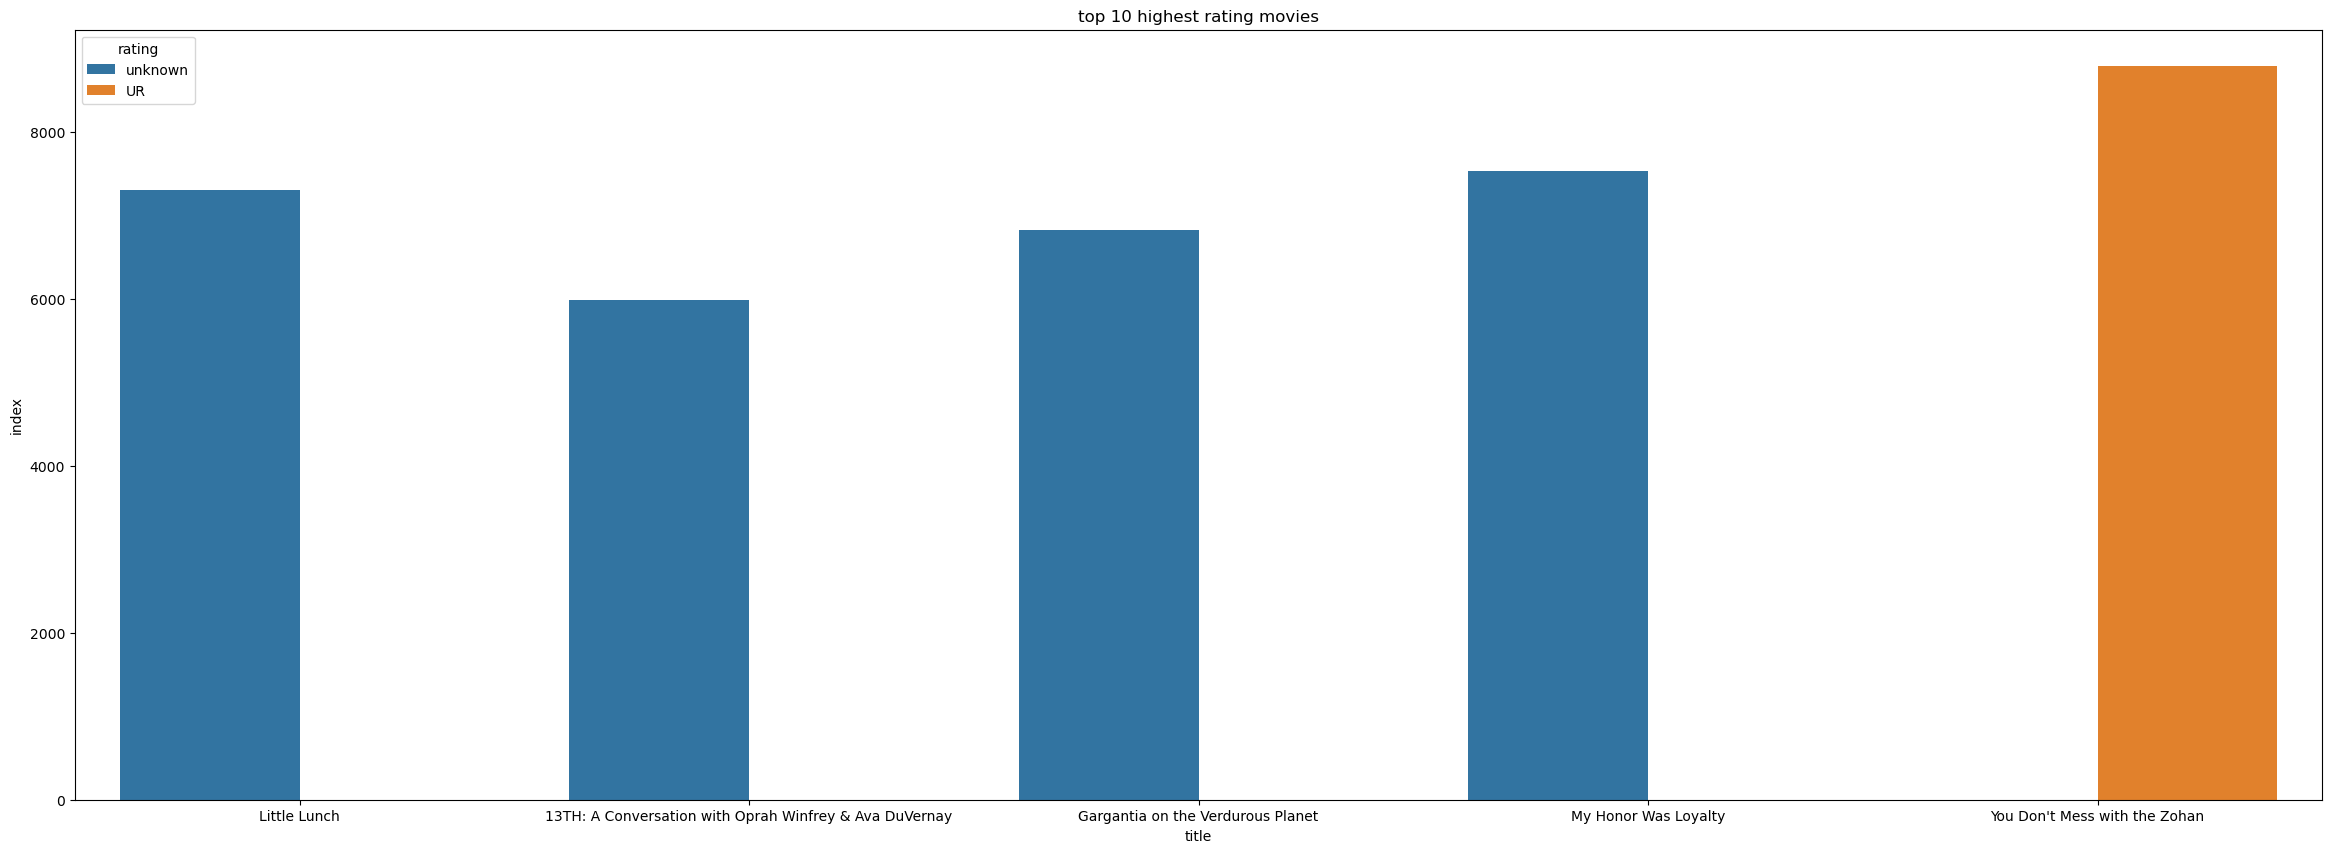

In [21]:
plt.figure(figsize=(29,10))
sns.barplot(x='title',y='index',hue='rating',data=Highest_rating)
plt.title('top 10 highest rating movies')
plt.xlabel('title')
plt.show()

In [22]:
#Movies based on Cast
Cast=data.sort_values(by='cast',ascending=True).head(10).reset_index()
Cast[['title','cast']]

,title,cast
0,Ojos in d' House,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od..."
1,2015 Dream Concert,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I..."
2,Set Up,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma..."
3,LEGO Jurassic World: The Indominus Escape,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc..."
4,One Heart: The A.R. Rahman Concert Film,A.R. Rahman
5,Neevevaro,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis..."
6,Shikara,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ..."
7,She,"Aaditi Pohankar, Vijay Varma, Vishwas Kini, Ki..."
8,Maharakshak: Aryan,"Aakarshan Singh, Vikramjeet Virk, Reena Aggarw..."
9,Cake,"Aamina Sheikh, Sanam Saeed, Adnan Malik, Moham..."


In [23]:
#Top 20 highest Duration Movies
High_Duration=data.sort_values(by='duration',ascending=False).head(20)
High_Duration[['title','duration']].reset_index()

,index,title,duration
0,5813,Louis C.K.: Live at the Comedy Store,unknown
1,5541,Louis C.K. 2017,unknown
2,5794,Louis C.K.: Hilarious,unknown
3,6915,Hangman,99 min
4,802,Ninja Assassin,99 min
5,877,Cinema Bandi,99 min
6,7369,Mad Money,99 min
7,858,678,99 min
8,7304,Like Arrows,99 min
9,6069,A.X.L.,99 min


In [24]:
#Movies according to directors
Directors=data.sort_values(by='duration',ascending=False).head(10).reset_index()
Directors[['title','director']]

,title,director
0,Louis C.K.: Live at the Comedy Store,Louis C.K.
1,Louis C.K. 2017,Louis C.K.
2,Louis C.K.: Hilarious,Louis C.K.
3,Hangman,Johnny Martin
4,Ninja Assassin,James McTeigue
5,Cinema Bandi,Praveen Kandregula
6,Mad Money,"Callie Khouri, Jesse V. Johnson"
7,678,Mohamed Diab
8,Like Arrows,Kevin Peeples
9,A.X.L.,Oliver Daly


# Recommendation System

In [25]:
data.shape

(8807, 9)

In [26]:
selected_features=['title','director','cast','country','release_year','rating','description','duration']
print(selected_features) # selecting the relevant columns for recommendation

['title', 'director', 'cast', 'country', 'release_year', 'rating', 'description', 'duration']


In [27]:
for feature in selected_features:
  data[feature] = data[feature].fillna('') # replacing the null valuess with null string

C:\Users\prave\AppData\Local\Temp\ipykernel_15016\433018602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].fillna('') # replacing the null valuess with null string


In [28]:
# combining all the 5 selected features

combined_features = data['title']+' '+data['director']+' '+data['cast']+' '+data['country']+' '+data['rating']
print(combined_features)

0       Dick Johnson Is Dead Kirsten Johnson unknown U...
1       Blood & Water unknown Ama Qamata, Khosi Ngema,...
2       Ganglands Julien Leclercq Sami Bouajila, Tracy...
3       Jailbirds New Orleans unknown unknown unknown ...
4       Kota Factory unknown Mayur More, Jitendra Kuma...
                              ...                        
8802    Zodiac David Fincher Mark Ruffalo, Jake Gyllen...
8803            Zombie Dumb unknown unknown unknown TV-Y7
8804    Zombieland Ruben Fleischer Jesse Eisenberg, Wo...
8805    Zoom Peter Hewitt Tim Allen, Courteney Cox, Ch...
8806    Zubaan Mozez Singh Vicky Kaushal, Sarah-Jane D...
Length: 8807, dtype: object


In [29]:
print(combined_features)

0       Dick Johnson Is Dead Kirsten Johnson unknown U...
1       Blood & Water unknown Ama Qamata, Khosi Ngema,...
2       Ganglands Julien Leclercq Sami Bouajila, Tracy...
3       Jailbirds New Orleans unknown unknown unknown ...
4       Kota Factory unknown Mayur More, Jitendra Kuma...
                              ...                        
8802    Zodiac David Fincher Mark Ruffalo, Jake Gyllen...
8803            Zombie Dumb unknown unknown unknown TV-Y7
8804    Zombieland Ruben Fleischer Jesse Eisenberg, Wo...
8805    Zoom Peter Hewitt Tim Allen, Courteney Cox, Ch...
8806    Zubaan Mozez Singh Vicky Kaushal, Sarah-Jane D...
Length: 8807, dtype: object


In [30]:
import difflib  #used to find close matches 
from sklearn.feature_extraction.text import TfidfVectorizer  #Used to convert data into feature vectors
from sklearn.metrics.pairwise import cosine_similarity #it compute similarity score based on their feature vectors

In [31]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer() #Term frequency inverse document frequency

In [32]:
feature_vectors = vectorizer.fit_transform(combined_features) #used to fit the vectorizer

In [33]:
print(feature_vectors)

  (0, 14)	0.2095848375284653
  (0, 28462)	0.14512769711493223
  (0, 35039)	0.10122357766868177
  (0, 38181)	0.09371741969480228
  (0, 38186)	0.10445662211492952
  (0, 19476)	0.39933888305980436
  (0, 8951)	0.37389055444277297
  (0, 16865)	0.3270553011121225
  (0, 17853)	0.577166396309789
  (0, 9576)	0.4070870727922675
  (1, 21996)	0.03553289437962149
  (1, 37907)	0.021573681332812913
  (1, 666)	0.10457737214753215
  (1, 34734)	0.07782976832159248
  (1, 24566)	0.1594240312601484
  (1, 28044)	0.0851737213073593
  (1, 24245)	0.09487964175216106
  (1, 33275)	0.1666184994378039
  (1, 39817)	0.09085809042650954
  (1, 10224)	0.1443897968176494
  (1, 32655)	0.13636988949512924
  (1, 32078)	0.1543194748528331
  (1, 23208)	0.1666184994378039
  (1, 23771)	0.1666184994378039
  (1, 14481)	0.1666184994378039
  :	:
  (8805, 35039)	0.05922687364422898
  (8805, 38181)	0.05483494954797043
  (8806, 37659)	0.26504541432218676
  (8806, 33159)	0.26504541432218676
  (8806, 30168)	0.26504541432218676
  (8806,

In [34]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors) #it compute pair wise similarity
print(similarity.shape)
len(similarity)

(8807, 8807)


8807

In [35]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : shiva


In [36]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = data['title'].tolist()
print(list_of_all_titles)


['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Dragon', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws 3', 'Jaws: The Revenge

In [37]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Shiva', 'Ishqiya', 'Vivah']


In [38]:
close_match = find_close_match[0]
print(close_match)

Shiva


In [39]:
# finding the index of the movie with title

index_of_the_movie = data[data.title == close_match]['index'].values[0]
print(index_of_the_movie)

8004


In [40]:
# Check if the index is within bounds before accessing similarity scores
if index_of_the_movie < len(similarity):
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    print(similarity_score)
else:
    print("Index out of bounds.")


[(0, 0.0), (1, 0.0027712332600054682), (2, 0.003940592690267095), (3, 0.010057684725336944), (4, 0.0131556397449644), (5, 0.0033744306651090367), (6, 0.0), (7, 0.003828952176044645), (8, 0.0015429414721806083), (9, 0.0), (10, 0.008404247074797592), (11, 0.0023165931736049378), (12, 0.003491250461459067), (13, 0.0010111823299109289), (14, 0.02966279696780546), (15, 0.00463476395798171), (16, 0.005814171089494383), (17, 0.0037896376172218116), (18, 0.0011316613683282927), (19, 0.004811578691228157), (20, 0.0018785142956417175), (21, 0.0009595419574818631), (22, 0.001408298423173332), (23, 0.0013188135458869308), (24, 0.01377789406979764), (25, 0.002398757392136096), (26, 0.0014608566267241912), (27, 0.0), (28, 0.0), (29, 0.007850956707448939), (30, 0.001084030971639153), (31, 0.004106039994157414), (32, 0.004795945230195338), (33, 0.0039857784353674215), (34, 0.0015385694199650558), (35, 0.0035229312079026937), (36, 0.0038015124166585396), (37, 0.0012901188301883415), (38, 0.0), (39, 0.0

In [41]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(8004, 1.0), (6299, 0.1959328252222153), (8671, 0.18970158502166404), (383, 0.1741765954071314), (6522, 0.17204280857383397), (7396, 0.16932121644667789), (6530, 0.16478108043704476), (1426, 0.15797047439833858), (4558, 0.15402300255026438), (7830, 0.1487380258120246), (200, 0.14736397506389148), (3496, 0.13975820224654095), (6520, 0.13299893709632113), (1000, 0.1308733352471516), (4802, 0.12321989392937231), (2716, 0.11881626507149115), (1019, 0.10829523781117792), (5962, 0.10686566477411936), (3142, 0.10675474640264589), (4442, 0.10654013936123101), (1076, 0.10233074334868235), (1077, 0.09837088755771564), (3981, 0.09705256937565059), (4588, 0.09680977619329698), (4431, 0.09470662691942772), (4937, 0.09363981187160518), (1078, 0.0929348349364698), (4507, 0.08902196572583508), (6293, 0.08809615740675401), (4440, 0.08588716841519702), (2832, 0.08508460576032185), (7874, 0.08490874521318138), (6870, 0.08437320531990275), (6517, 0.08377549642424116), (4611, 0.08365321498550218), (4456, 

In [42]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Shiva
2 . Bhoot
3 . Veerappan
4 . Department
5 . Company
6 . Mango Dreams
7 . Contract
8 . Gangaajal
9 . Agyaat
10 . Ramji Londonwaley
11 . Krishna Cottage
12 . Manmadhudu 2
13 . Comedy High School
14 . Wild Dog
15 . Zoo
16 . Brothers
17 . Lagaan
18 . 1920
19 . Lakshya
20 . Himmatwala
21 . Shiva VS Autobots
22 . Shiva: Journey to Plunotaria
23 . Delhi Crime
24 . My Friend Pinto
25 . Dhan Dhana Dhan Goal
26 . Ram Dass, Going Home
27 . Shiva: The Secret World Of Vedas City
28 . Sanju
29 . Beyond the Clouds


In [43]:
#movie recommendation system
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = data[data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = data[data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : shiva
Movies suggested for you : 

1 . Shiva
2 . Bhoot
3 . Veerappan
4 . Department
5 . Company
6 . Mango Dreams
7 . Contract
8 . Gangaajal
9 . Agyaat
10 . Ramji Londonwaley
11 . Krishna Cottage
12 . Manmadhudu 2
13 . Comedy High School
14 . Wild Dog
15 . Zoo
16 . Brothers
17 . Lagaan
18 . 1920
19 . Lakshya
20 . Himmatwala
21 . Shiva VS Autobots
22 . Shiva: Journey to Plunotaria
23 . Delhi Crime
24 . My Friend Pinto
25 . Dhan Dhana Dhan Goal
26 . Ram Dass, Going Home
27 . Shiva: The Secret World Of Vedas City
28 . Sanju
29 . Beyond the Clouds
